In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# output dir
out_dir = '../output/Fig3c'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

df = pd.read_parquet('../input/Dataset1(TOPACIO)/TOPACIO_raw_cylinter_clustering.parquet')

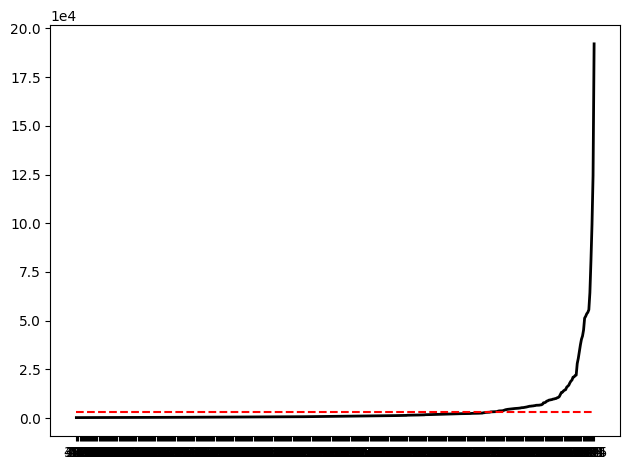

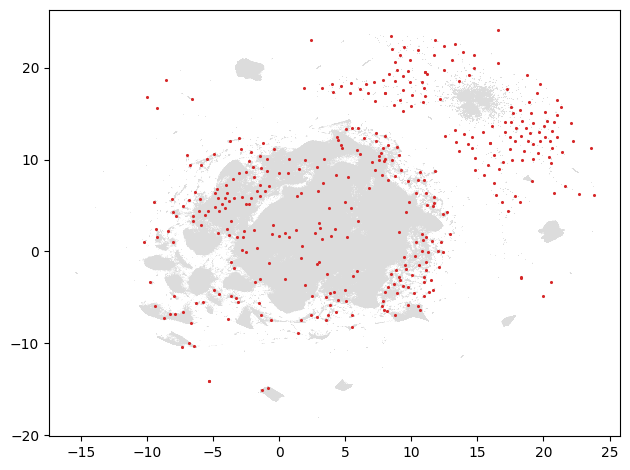

In [3]:
cluster_count_cutoff = 3000

cluster_sizes = df.groupby('cluster_2d').size().sort_values()
cluster_sizes.drop(-1, inplace=True)

plt.plot([str(i) for i in cluster_sizes.index], cluster_sizes, c='k', lw=2.0)
plt.hlines(
    cluster_count_cutoff, cluster_sizes.index.min(), cluster_sizes.index.max(),
    colors='r', linestyles='--'
)
plt.ticklabel_format(axis='y', style='sci', scilimits=(4, 4))

plt.tight_layout()
plt.savefig(os.path.join(out_dir, 'topacio_small_clus1.pdf'))
plt.show()
plt.close('all')

my_ids = [
    i for i in cluster_sizes.index if cluster_sizes[i] < cluster_count_cutoff
]

plt.scatter(df['emb1'], df['emb2'], s=0.05, lw=0.0, c='gainsboro')

for i in my_ids:
    emb1_mean = df['emb1'][df['cluster_2d'] == i].mean()
    emb2_mean = df['emb2'][df['cluster_2d'] == i].mean()
    plt.scatter(
        emb1_mean, emb2_mean, s=5.0, lw=0.0, c='tab:red')

plt.tight_layout()
plt.savefig(os.path.join(out_dir, 'topacio_small_clus2.png'), dpi=800)
plt.show()
plt.close('all')